In [1]:
from IPython.display import Markdown

Markdown("""
# 📊 Análise de Nascimentos por Mês (2023)

A intenção desse exercicio é de descobrir qual a proporção de nascimento por Signos. 

Será que a proporção é a mesma por signo?

fonte de dados IBGE https://sidra.ibge.gov.br/tabela/2612

Este gráfico apresenta a distribuição do número total de nascimentos no Brasil em 2023, com base nos dados do IBGE.

## 🔍 Detalhes:
- **Fonte**: IBGE – Estatísticas do Registro Civil.
- **Unidade**: Total de nascidos vivos por mês.
- **Ano base**: 2023.

## 📌 Observações:
- Os dados incluem todos os nascimentos registrados por mês.
- A coluna 'Ignorado' foi desconsiderada por ausência de valor.
- O gráfico pode ser utilizado para análises sazonais e correlação com signos do zodíaco.

---
""")

#


# 📊 Análise de Nascimentos por Mês (2023)

A intenção desse exercicio é de descobrir qual a proporção de nascimento por Signos. 

Será que a proporção é a mesma por signo?

fonte de dados IBGE https://sidra.ibge.gov.br/tabela/2612

Este gráfico apresenta a distribuição do número total de nascimentos no Brasil em 2023, com base nos dados do IBGE.

## 🔍 Detalhes:
- **Fonte**: IBGE – Estatísticas do Registro Civil.
- **Unidade**: Total de nascidos vivos por mês.
- **Ano base**: 2023.

## 📌 Observações:
- Os dados incluem todos os nascimentos registrados por mês.
- A coluna 'Ignorado' foi desconsiderada por ausência de valor.
- O gráfico pode ser utilizado para análises sazonais e correlação com signos do zodíaco.

---


In [3]:
import pandas as pd

df = pd.read_excel(
    r'C:\Users\User\OneDrive - DATI - Soluções em TI\Documentos\Analise de Dados\Signos_exercicios\tabela2612.xlsx',
    #    skiprows=4  # Ajuste esse número se os dados começarem depois
)

# Exibir as linhas relevantes (linha 3 e linha 6 — índice 3 e 6)
linha_meses = df.iloc[3]
linha_valores = df.iloc[6]


In [4]:
# Ajustar o índice de onde começam os meses (coluna 4 = index 4)
meses = linha_meses[4:]
valores = linha_valores[4:]


In [5]:
# Criar o DataFrame final
df_mes_nascimentos = pd.DataFrame({
    'mes': meses.values,
    'total_nascimentos': valores.values
})

# Converter os valores para inteiros (remover texto, se necessário)
df_mes_nascimentos['total_nascimentos'] = pd.to_numeric(df_mes_nascimentos['total_nascimentos'], errors='coerce')


In [6]:
df_mes_nascimentos

,mes,total_nascimentos
0,Janeiro,221560.0
1,Fevereiro,203088.0
2,Março,233432.0
3,Abril,218047.0
4,Maio,230394.0
5,Junho,216496.0
6,Julho,210353.0
7,Agosto,208245.0
8,Setembro,202903.0
9,Outubro,198886.0


In [7]:


# Seu DataFrame real
df_mes_nascimentos = pd.DataFrame({
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
            'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro', 'Ignorado'],
    'total_nascimentos': [221560, 203088, 233432, 218047, 230394, 216496,
                          210353, 208245, 202903, 198886, 184411, 191452, None]
})

# Remover linha com mês "Ignorado"
df_mes_nascimentos = df_mes_nascimentos[df_mes_nascimentos['mes'] != 'Ignorado']

# Mapeamento de signo principal por mês
signos_por_mes = {
    'Janeiro': 'Capricórnio',
    'Fevereiro': 'Aquário',
    'Março': 'Peixes',
    'Abril': 'Áries',
    'Maio': 'Touro',
    'Junho': 'Gêmeos',
    'Julho': 'Câncer',
    'Agosto': 'Leão',
    'Setembro': 'Virgem',
    'Outubro': 'Libra',
    'Novembro': 'Escorpião',
    'Dezembro': 'Sagitário'
}

# Adicionar coluna de signos
df_mes_nascimentos['signo'] = df_mes_nascimentos['mes'].map(signos_por_mes)

# Calcular percentual
total_geral = df_mes_nascimentos['total_nascimentos'].sum()
df_mes_nascimentos['percentual'] = (df_mes_nascimentos['total_nascimentos'] / total_geral * 100).round(2)

# Exibir resultado
print(df_mes_nascimentos)


          mes  total_nascimentos        signo  percentual
0     Janeiro           221560.0  Capricórnio        8.79
1   Fevereiro           203088.0      Aquário        8.06
2       Março           233432.0       Peixes        9.27
3       Abril           218047.0        Áries        8.66
4        Maio           230394.0        Touro        9.15
5       Junho           216496.0       Gêmeos        8.59
6       Julho           210353.0       Câncer        8.35
7      Agosto           208245.0         Leão        8.27
8    Setembro           202903.0       Virgem        8.05
9     Outubro           198886.0        Libra        7.89
10   Novembro           184411.0    Escorpião        7.32
11   Dezembro           191452.0    Sagitário        7.60


C:\Users\User\AppData\Local\Temp\ipykernel_10112\1335455262.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_mes_nascimentos, x='signo', y='percentual', palette='Blues_d')


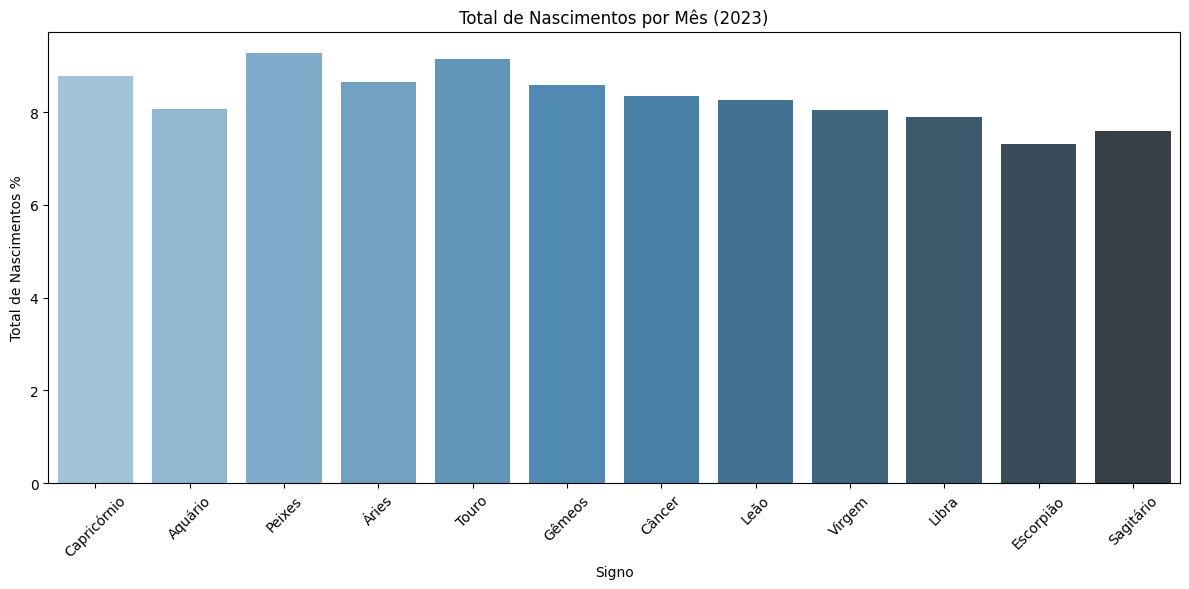

In [9]:

import matplotlib.pyplot as plt
import seaborn as sns


# Criar gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=df_mes_nascimentos, x='signo', y='percentual', palette='Blues_d')

plt.title('Total de Nascimentos por Mês (2023)')
plt.xlabel('Signo')
plt.ylabel('Total de Nascimentos %')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
